What is Fisher Score and Chi2 ( χ2) Test

Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of features.

Chi Square (χ2) Test
A chi-squared test, also written as X2

test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution.

chi-square test measures dependence between stochastic variables, so using this function weeds out the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)
titanic = titanic.dropna()
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()#taken only categorical data without null values
data.head()

pclass     sex  sibsp  parch embarked    who  alone
0       3    male      1      0        S    man  False
1       1  female      1      0        C  woman  False
2       3  female      0      0        S  woman   True
3       1  female      1      0        S  woman  False
4       3    male      0      0        S    man   True

In [7]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [8]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)
data.head()

pclass  sex  sibsp  parch embarked    who  alone
0       3    0      1      0        S    man  False
1       1    1      1      0        C  woman  False
2       3    1      0      0        S  woman   True
3       1    1      1      0        S  woman  False
4       3    0      0      0        S    man   True

In [9]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [10]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [11]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)
data.head()

pclass  sex  sibsp  parch  embarked  who  alone
0       3    0      1      0         0    0      0
1       1    1      1      0         1    1      0
2       3    1      0      0         0    1      1
3       1    1      1      0         0    1      0
4       3    0      0      0         0    0      1

Do F_Score

In [12]:
X = data.copy()
y = titanic['survived']
X.shape, y.shape

((889, 7), (889,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
f_score = chi2(X_train, y_train)
f_score#1ST ARRAY HAS F VALUES AND 2ND HAVE P VALUES

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [14]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values
#who and sex have extremely low value(p<0.05 considered(remember isha???))

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

Text(0.5, 1.0, 'pvalues with respect to features')

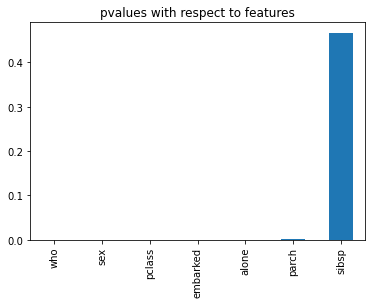

In [15]:
p_values.plot.bar()
plt.title('pvalues with respect to features')

In [16]:
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

In [17]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [18]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
Wall time: 279 ms


In [19]:
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]

In [20]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
Wall time: 261 ms


In [21]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]

In [22]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
Wall time: 227 ms


In [23]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'alone']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'alone']]

In [24]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 230 ms


In [25]:
X_train_5 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
X_test_5 = X_test[['who', 'sex', 'pclass', 'embarked', 'alone']]    

In [26]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 227 ms


In [27]:
#original dataset

In [29]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
Wall time: 228 ms
